## How many males and females are there in the dataset ?

In [3]:
import os # Importing library for operating system
import numpy as np # Importing library to handle number arrays 
import pandas as pd # Importing library to handle data frames 
import matplotlib.pyplot as plt # Importing library for plotting
## Reading Data
data = pd.read_excel("data/HeightWeight.xlsx") 
data = data.dropna()
## Finding the frequency of males and females
frequency = data['GENDER'].value_counts()
frequency


2    59
1    40
Name: GENDER, dtype: int64

**Inferences**
 - The dataset has 59 females and 40 males

## How is the histogram of height for males and females separately?


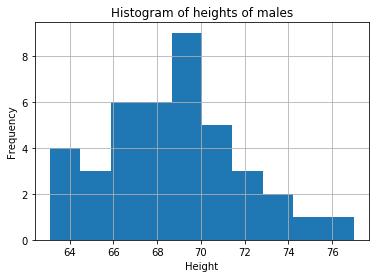

In [2]:
## Slicing the data for only males
data_male = data[data['GENDER']==1]
## Making histogram for males
plt.hist(data_male['HEIGHT'])
plt.title("Histogram of heights of males")
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.grid()
plt.show()
          

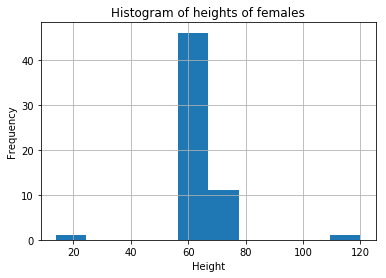

In [9]:
## Slicing the data for only males
data_female = data[data['GENDER']==2]
## Making histogram for males
plt.hist(data_female['HEIGHT'])
plt.title("Histogram of heights of females")
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.grid()
plt.show()

**Inferences**
-   The distribution of height of males is as par expectation
-   But the distribution of heights of females seem to contain outliers: 20 inches and 110 inches
-   Hence delete those two data points and replot the histogram.

## How is the histogram of females after deleting the outliers ?

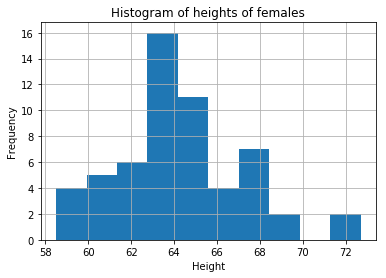

In [12]:
data_females_outliersdeleted = data_female[data_female['HEIGHT'] <90]
data_females_outliersdeleted = data_females_outliersdeleted[data_females_outliersdeleted['HEIGHT'] >40] 
plt.hist(data_females_outliersdeleted['HEIGHT'])
plt.title("Histogram of heights of females")
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.grid()
plt.show()

## How is the scatterplot and correlation between HEIGHT and WEIGHT for males ?

0.51563105787408


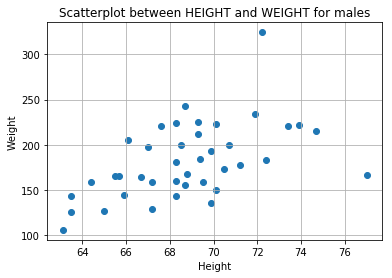

In [14]:
print (np.corrcoef(data_male['HEIGHT'],data_male['WEIGHT'])[0][1]) 
plt.scatter(data_male['HEIGHT'], data_male['WEIGHT']) 
plt.title("Scatterplot between HEIGHT and WEIGHT for males") 
plt.xlabel("Height")
plt.ylabel("Weight")
plt.grid()
plt.show()

0.5972599860320664


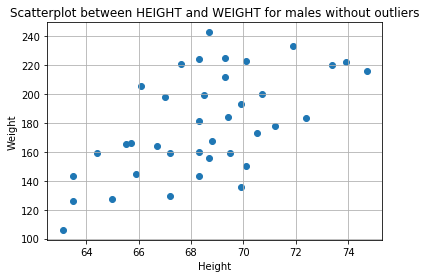

In [15]:
data_male_deletedOutliers = data_male[data_male['HEIGHT'] < 76]
data_male_deletedOutliers = data_male_deletedOutliers[data_male_deletedOutliers['WEIGHT']<300] 
print (np.corrcoef(data_male_deletedOutliers['HEIGHT'],data_male_deletedOutliers['WEIGHT'])[0][1]) 
plt.scatter(data_male_deletedOutliers['HEIGHT'], data_male_deletedOutliers['WEIGHT']) 
plt.title("Scatterplot between HEIGHT and WEIGHT for males without outliers")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.grid()
plt.show()

## How is the scatterplot and correlation between HEIGHT and WEIGHT for females ? 
Take the data that is already cleaned up.

0.36112685656383814


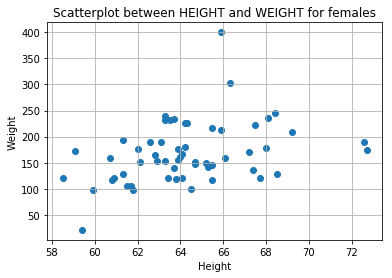

In [16]:
print (np.corrcoef(data_females_outliersdeleted['HEIGHT'],data_females_outliersdeleted['WEIGHT'])[0][1]) 
plt.scatter(data_females_outliersdeleted['HEIGHT'], data_females_outliersdeleted['WEIGHT']) 
plt.title("Scatterplot between HEIGHT and WEIGHT for females")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.grid()
plt.show()

0.41219092239179156


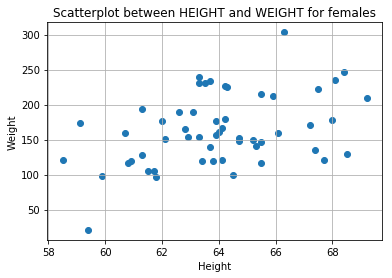

In [17]:
data_females_outliersdeleted = data_females_outliersdeleted[data_females_outliersdeleted['HEIGHT'] <70] 
data_females_outliersdeleted = data_females_outliersdeleted[data_females_outliersdeleted['WEIGHT'] <350] 
print (np.corrcoef(data_females_outliersdeleted['HEIGHT'],data_females_outliersdeleted['WEIGHT'])[0][1]) 
plt.scatter(data_females_outliersdeleted['HEIGHT'], data_females_outliersdeleted['WEIGHT']) 
plt.title("Scatterplot between HEIGHT and WEIGHT for females")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.grid()
plt.show()

# Simple Linear Regression

## Splitting the data

In [19]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
## Creating training dataset
data_male_deletedOutliers_train_HEIGHT = data_male_deletedOutliers['HEIGHT'][:-10] 
data_male_deletedOutliers_train_WEIGHT = data_male_deletedOutliers['WEIGHT'][:-10]
## Creating test dataset
data_male_deletedOutliers_test_HEIGHT = data_male_deletedOutliers['HEIGHT'][-10:] 
data_male_deletedOutliers_test_WEIGHT = data_male_deletedOutliers['WEIGHT'][-10:]


In [23]:
print(data_male_deletedOutliers_train_HEIGHT) 

1     67.0
3     71.2
4     69.3
11    69.3
13    70.5
14    73.9
15    66.1
17    68.8
18    68.3
20    68.7
21    65.7
22    68.3
23    65.9
24    69.4
27    65.0
36    69.9
38    68.7
39    73.4
48    67.2
50    63.5
51    70.1
54    68.5
57    67.2
58    68.3
59    69.9
60    66.7
65    70.1
66    72.4
Name: HEIGHT, dtype: float64


In [22]:
print(data_male_deletedOutliers_train_WEIGHT)

1     198.0
3     177.7
4     225.3
11    212.1
13    173.1
14    222.2
15    205.7
17    167.3
18    160.1
20    242.9
21    166.0
22    181.2
23    144.8
24    184.3
27    127.4
36    193.3
38    155.6
39    220.5
48    129.4
50    143.5
51    150.6
54    199.7
57    159.2
58    224.2
59    136.0
60    164.2
65    222.7
66    183.2
Name: WEIGHT, dtype: float64


## Fitting linear regression

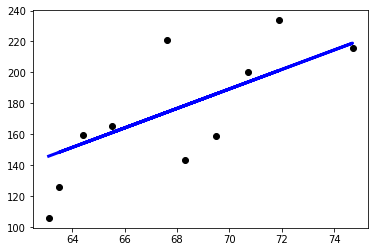

In [27]:
## Create linear regression object
regr = linear_model.LinearRegression()
## Train the model using the training sets 
regr.fit(data_male_deletedOutliers_train_HEIGHT.values.reshape(-1,1),
         data_male_deletedOutliers_train_WEIGHT.values.reshape(-1,1))

## Make predictions using the testing set
data_males_WEIGHT_predicted = regr.predict(data_male_deletedOutliers_test_HEIGHT.values.reshape(-1,1))

## Make plots of predicted Weight and Actual Weight for the test data
plt.scatter(data_male_deletedOutliers_test_HEIGHT, data_male_deletedOutliers_test_WEIGHT, color='black') 
plt.plot(data_male_deletedOutliers_test_HEIGHT, data_males_WEIGHT_predicted, color='blue', linewidth=3)

plt.xticks()
plt.yticks()
plt.show()

## How good is the Linear fit ?


In [31]:
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(data_male_deletedOutliers_test_WEIGHT, data_males_WEIGHT_predicted)))

Root Mean squared error: 27.22


The closer the value is to 0 for RMSE, the better the prediction quality is.
 

## What is the predicted weight when height is 68 inches ?

In [37]:
regr.predict(np.array([[68]]))

array([[176.73830428]])

## Can we determine the weight of females using all the variables in the dataset (except BMI over 30) ?


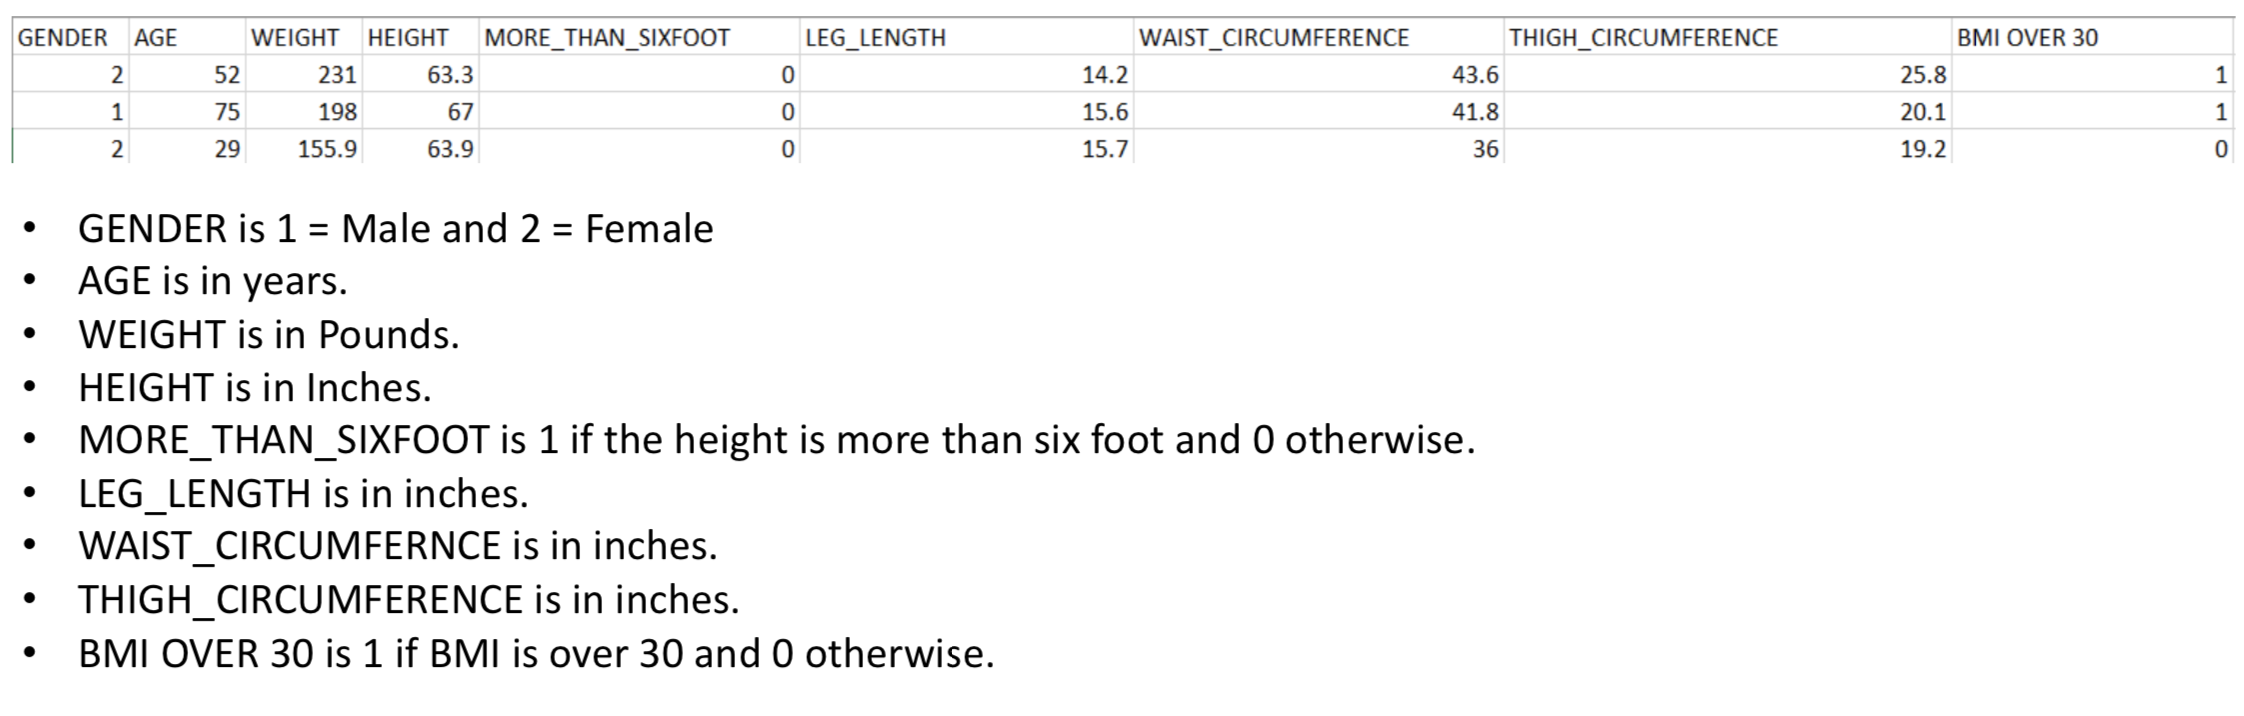

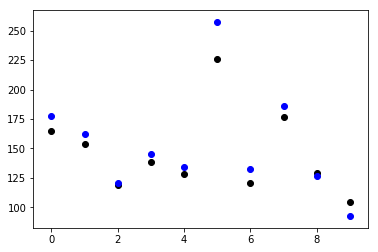

In [38]:
data_females_outliersdeleted_drop_BMI = data_females_outliersdeleted.drop(['BMI OVER 30'], axis = 1)
data_females_outliersdeleted_drop_BMI = data_females_outliersdeleted_drop_BMI[data_females_outliersdeleted_drop_BMI['LEG_LENGTH'] > 0] 
data_females_outliersdeleted_drop_BMI = data_females_outliersdeleted_drop_BMI[data_females_outliersdeleted_drop_BMI['WAIST_CIRCUMFERENCE'] > 0] 
data_females_outliersdeleted_drop_BMI = data_females_outliersdeleted_drop_BMI[data_females_outliersdeleted_drop_BMI['THIGH_CIRCUMFERENCE'] > 0]
## Creating training dataset
data_females_outliersdeleted_train_X = data_females_outliersdeleted_drop_BMI[:-10] 
data_females_outliersdeleted_train_X = data_females_outliersdeleted_train_X.drop(['WEIGHT'], axis = 1) 
data_females_outliersdeleted_train_Y = data_females_outliersdeleted_drop_BMI['WEIGHT'][:-10]
## Creating test dataset
data_females_outliersdeleted_test_X = data_females_outliersdeleted_drop_BMI[-10:] 
data_females_outliersdeleted_test_X = data_females_outliersdeleted_test_X.drop(['WEIGHT'], axis = 1) 
data_females_outliersdeleted_test_Y = data_females_outliersdeleted_drop_BMI['WEIGHT'][-10:]

## Create linear regression object 
regr = linear_model.LinearRegression()
## Train the model using the training sets 
regr.fit(data_females_outliersdeleted_train_X, data_females_outliersdeleted_train_Y)
## Make predictions using the testing set
data_females_WEIGHT_predicted = regr.predict(data_females_outliersdeleted_test_X)

## Making plots of actual weights and predicted weights/
plt.scatter(np.arange(len(data_females_WEIGHT_predicted)), data_females_outliersdeleted_test_Y, color = 'k') 
plt.scatter(np.arange(len(data_females_WEIGHT_predicted)), data_females_WEIGHT_predicted, color = 'b') 
plt.show()

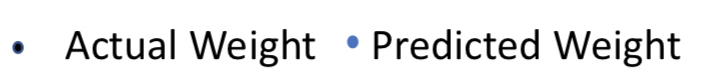

## How good is the Linear fit ?

In [39]:
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(data_females_outliersdeleted_test_Y,
data_females_WEIGHT_predicted)))

Root Mean squared error: 12.81


## How to determine importance of different features ?

In [41]:
import sklearn

sklearn.feature_selection.f_regression(data_females_outliersdeleted_train_X, data_females_outliersdeleted_train_Y, center=True)

/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value enco

(array([         nan,   1.9222954 ,   7.19030285,          nan,
          1.26599645, 291.85617109, 157.65387291]),
 array([           nan, 1.73685091e-01, 1.07847714e-02,            nan,
        2.67575867e-01, 2.00487357e-19, 4.27671504e-15]))

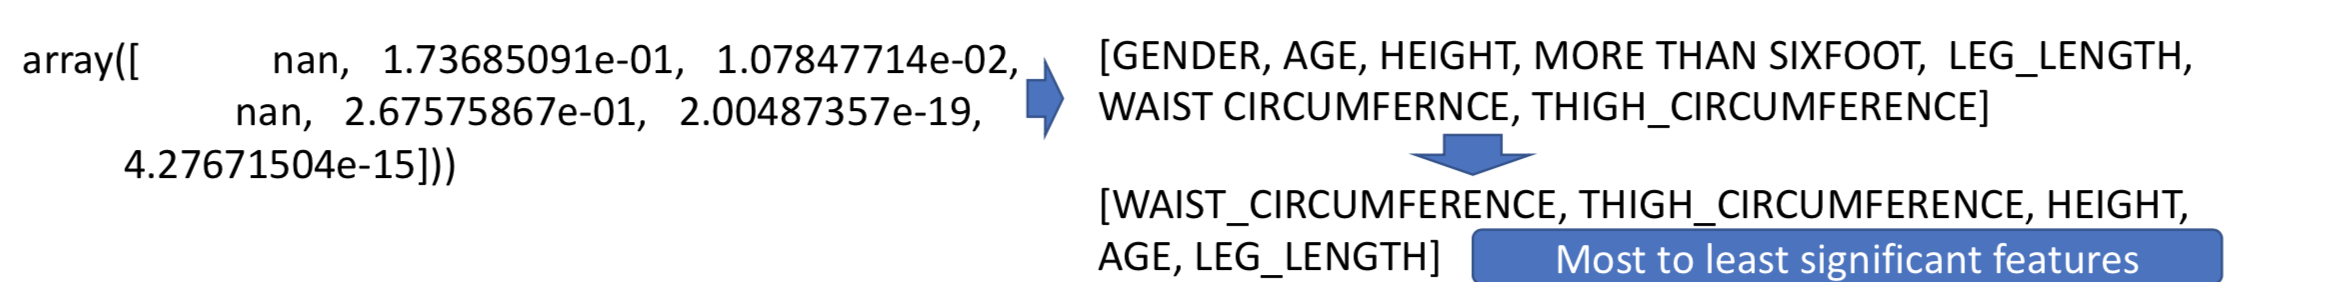